In [1]:
exec(open("objet.py").read(), globals())

### Just to visualize

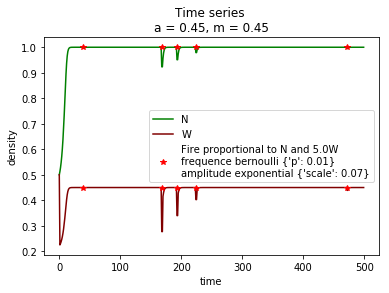

In [2]:
O = Ode(model = "allee_effect_adi", Init=[0.5, 0.5], Param_phy= [0.45, 0.45], finalTime = 500)
O.perturbation()
O.solve_by_part()
O.plot_time_series()

In [13]:
def variability(Y):
    N, W = Y
    return np.var(N)

def collapse(Y):
    eps = 1e-3
    N, W = Y
    if(N[-1] < eps):
        return True
    else:
        return False

In [59]:
Number_of_simulation = 100
Variability = np.zeros(Number_of_simulation)
Collapse = np.zeros_like(Variability)

#finalTime = np.linspace(1, 100, 100)
FinalTime = [10**i for i in range(1, 5)]

Variability = np.zeros((len(FinalTime), Number_of_simulation))
Collapse = np.zeros_like(Variability)


for i, finalTime in enumerate(FinalTime):
    for j in range(Number_of_simulation):
        O = Ode(model = "allee_effect_adi", Init=[0.5, 0.5], Param_phy= [0.45, 0.45], finalTime = finalTime)
        O.perturbation()
        Y = O.solve_by_part()
        Variability[i, j] = variability(Y)
#        print(collapse(Y))
        Collapse[i, j] = collapse(Y)    
Var_m = np.mean(Variability, axis= 1)
Col_m = np.mean(Collapse, axis= 1)

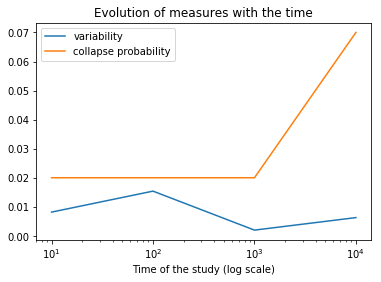

In [60]:
plt.semilogx(FinalTime, Var_m, label="variability")
plt.semilogx(FinalTime, Col_m, label="collapse probability")
plt.legend()
plt.xlabel("Time of the study (log scale)")
plt.title("Evolution of measures with the time")
#plt.savefig("plot/Evolution of measures with the time")
plt.show()